In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# Cleaning

In [4]:
# drop trips where previous stop was cancelled

wego = wego.drop(wego[wego.PREV_SCHED_STOP_CANCELLED == 1.0].index)

In [5]:
wego = wego.drop(wego[(wego['ADJUSTED_EARLY_COUNT'] == 0.0) & (wego['ADJUSTED_LATE_COUNT'] == 0.0) & (wego['ADJUSTED_ONTIME_COUNT'] == 0.0)].index)

In [6]:
percentile1adh=wego['ADHERENCE'].quantile(0.001)
print(percentile1adh)

percentile99adh=wego['ADHERENCE'].quantile(0.999)
print(percentile99adh)

print('')

percentile1hdwy=wego['HDWY_DEV'].quantile(0.001)
print(percentile1hdwy)

percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
print(percentile99hdwy)

-57.040499999999994
9.466666

-21.624767162
56.43715000000084


In [7]:
wego = wego.drop(wego[wego.ADHERENCE < percentile1adh].index)
wego = wego.drop(wego[wego.ADHERENCE > percentile99adh].index)
wego = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
wego = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

In [8]:
# drop trips where scheduled headway was 0
wego = wego.drop(wego[wego.SCHEDULED_HDWY == 0].index)

In [9]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                333927 non-null  int64  
 1   SERVICE_ABBR               333927 non-null  int64  
 2   ADHERENCE_ID               333927 non-null  int64  
 3   DATE                       333927 non-null  object 
 4   ROUTE_ABBR                 333927 non-null  int64  
 5   BLOCK_ABBR                 333927 non-null  int64  
 6   OPERATOR                   333927 non-null  int64  
 7   TRIP_ID                    333927 non-null  int64  
 8   OVERLOAD_ID                333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME       333927 non-null  object 
 10  TIME_POINT_ABBR            333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE        333922 non-null  float64
 12  TRIP_EDGE                  333927 non-null  int64  
 13  LATITUDE                   333927 

# Q1

### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [10]:
wego_on_time = (wego
 [['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']]
 .mean()*100
 ).reset_index()
# .sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)
# wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

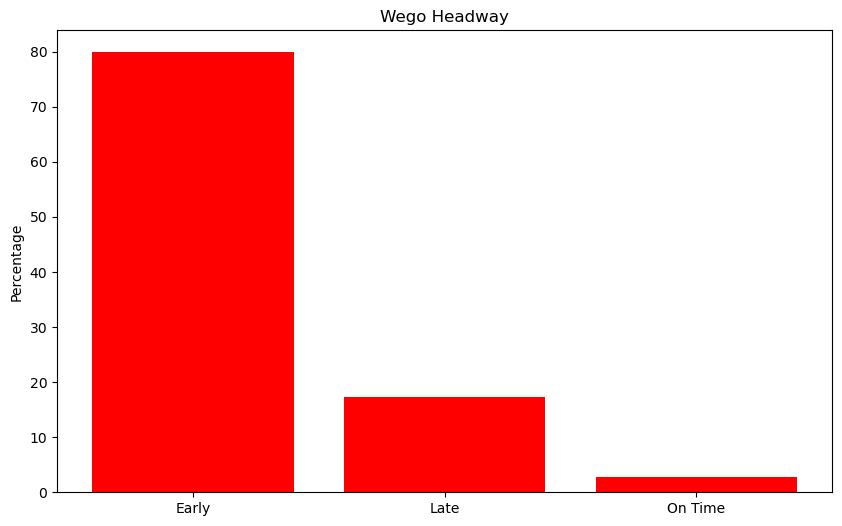

In [11]:
x=wego_on_time['index']
y=wego_on_time[0]

ax=['Early', 'Late', 'On Time']

plt.figure(figsize=(10,6))

plt.bar(ax, y, color='r')
plt.ylabel("Percentage")
plt.title("Wego Headway")
plt.show()

In [12]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [13]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-56.800000
max,9.466666
mean,-3.085795


In [14]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

,HDWY_DEV
min,-21.600000
max,56.400000
mean,0.398935


C:\Users\tayjy\AppData\Local\Temp\ipykernel_8720\928343750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wego['HDWY_DEV'])
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\AppData\Local\Temp\ipykernel_8720\928343750.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility

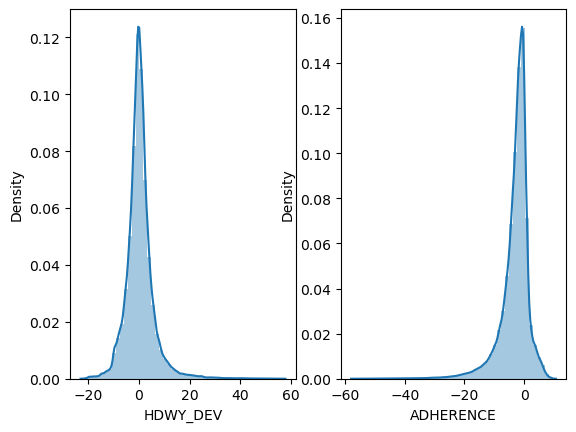

In [15]:
plt.subplot(1,2,1)
sns.distplot(wego['HDWY_DEV'])

plt.subplot(1,2,2)
sns.distplot(wego['ADHERENCE'])

plt.show()

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

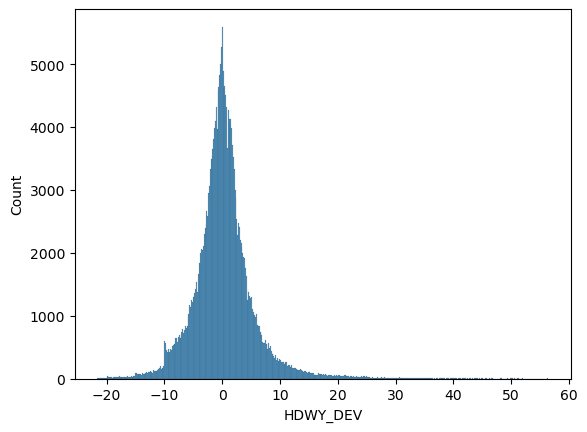

In [16]:
sns.histplot(data=wego, x="HDWY_DEV")

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HDWY_DEV', ylabel='Count'>

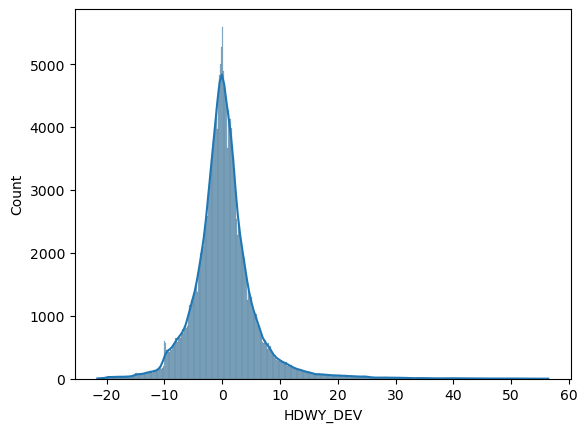

In [17]:
sns.histplot(data=wego, x="HDWY_DEV", kde=True)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADHERENCE', ylabel='Count'>

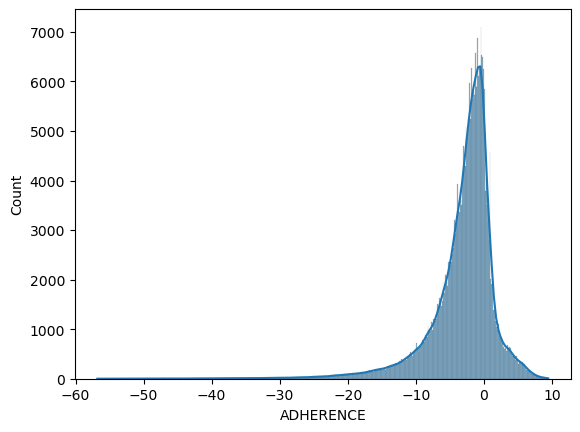

In [18]:
sns.histplot(data=wego, x="ADHERENCE", kde=True)

<Axes: ylabel='HDWY_DEV'>

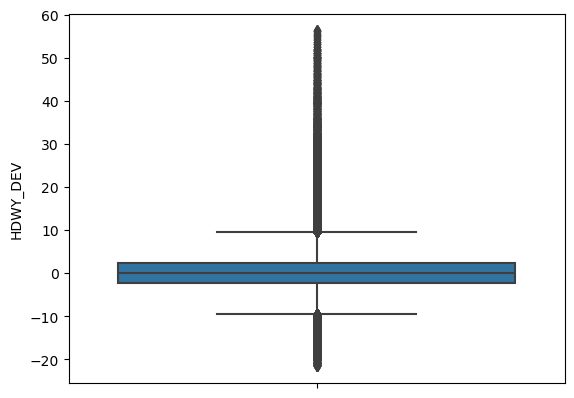

In [19]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

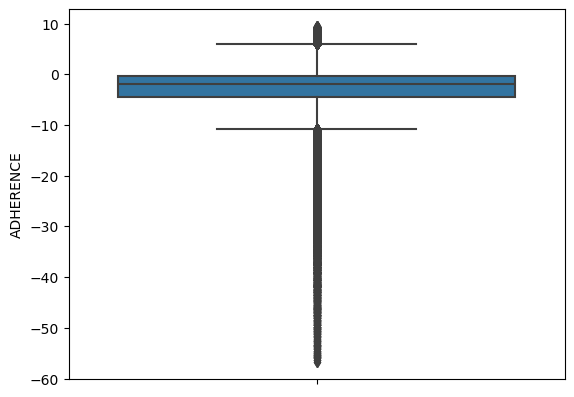

In [20]:
sns.boxplot( y=wego['ADHERENCE'])

In [21]:
# create headway deviation % column and bunching/gapping, acceptable range for each trip, is within range 1/0

In [22]:
# del wego['BUNCHING_OR_GAPPING']

In [23]:
wego['HEADWAY_DEVIATION_PERCENTAGE'] = round((wego['HDWY_DEV']/wego['SCHEDULED_HDWY'])*100,2)



wego['HEADWAY_IS_BUNCHING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       < -50, '1','0')
wego['HEADWAY_IS_ACCEPTABLE'] = np.where((wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       >= -50)&(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       <= 50), '1','0')
wego['HEADWAY_IS_GAPPING'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'] 
                       > 50, '1','0')
wego['HEADWAY_IS_UNKNOWN'] = np.where(wego['HEADWAY_DEVIATION_PERCENTAGE'].isna()
                       == True, '1','0')

In [24]:
wego.head(500)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HEADWAY_DEVIATION_PERCENTAGE,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,HEADWAY_IS_UNKNOWN
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,NaN,0,0,0,1
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,0,0,0,1
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,120230801,1,99458465,2023-08-01,23,2300,2041,345453,0,FROM DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,0,0,0,1
566,120230801,1,99458466,2023-08-01,23,2300,2041,345454,0,TO DOWNTOWN,...,0,0.0,0,14.766666,9.0,4.31,0,1,0,0
567,120230801,1,99458467,2023-08-01,23,2300,2041,345454,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,0.97,0,1,0,0
568,120230801,1,99458468,2023-08-01,23,2300,2041,345454,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,6.25,0,1,0,0


In [25]:
wego['HEADWAY_IS_BUNCHING'] = wego['HEADWAY_IS_BUNCHING'].astype(int)
wego['HEADWAY_IS_ACCEPTABLE'] = wego['HEADWAY_IS_ACCEPTABLE'].astype(int)
wego['HEADWAY_IS_GAPPING'] = wego['HEADWAY_IS_GAPPING'].astype(int)
wego['HEADWAY_IS_UNKNOWN'] = wego['HEADWAY_IS_UNKNOWN'].astype(int)

In [26]:
wego_drop_unknown = wego.drop(wego[wego.HEADWAY_IS_UNKNOWN == 1].index)
wego_drop_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261287 entries, 7 to 350327
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   261287 non-null  int64  
 1   SERVICE_ABBR                  261287 non-null  int64  
 2   ADHERENCE_ID                  261287 non-null  int64  
 3   DATE                          261287 non-null  object 
 4   ROUTE_ABBR                    261287 non-null  int64  
 5   BLOCK_ABBR                    261287 non-null  int64  
 6   OPERATOR                      261287 non-null  int64  
 7   TRIP_ID                       261287 non-null  int64  
 8   OVERLOAD_ID                   261287 non-null  int64  
 9   ROUTE_DIRECTION_NAME          261287 non-null  object 
 10  TIME_POINT_ABBR               261287 non-null  object 
 11  ROUTE_STOP_SEQUENCE           261282 non-null  float64
 12  TRIP_EDGE                     261287 non-null  in

In [27]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [28]:
wego[['HEADWAY_IS_BUNCHING','HEADWAY_IS_ACCEPTABLE','HEADWAY_IS_GAPPING','HEADWAY_IS_UNKNOWN']].value_counts().sort_values().reset_index()

,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,HEADWAY_IS_UNKNOWN,count
0,1,0,0,0,17243
1,0,0,1,0,20562
2,0,0,0,1,72640
3,0,1,0,0,223482


In [29]:
# wego[wego['SCHEDULED_HDWY']==1e-10]

In [30]:
# wego['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')

# Q2

### How does direction of travel, route, or location affect the headway and on-time performance?

## Total Direction

In [31]:
total = wego['ROUTE_DIRECTION_NAME'].value_counts().reset_index()
total

,ROUTE_DIRECTION_NAME,count
0,FROM DOWNTOWN,176992
1,TO DOWNTOWN,156935


In [75]:
# 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
on_time = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
on_time

,ROUTE_DIRECTION_NAME,ADJUSTED_ONTIME_COUNT,count
0,TO DOWNTOWN,1,133661
1,FROM DOWNTOWN,1,133139
2,FROM DOWNTOWN,0,43853
3,TO DOWNTOWN,0,23274


In [33]:
early = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_EARLY_COUNT']].value_counts().reset_index()
early

,ROUTE_DIRECTION_NAME,ADJUSTED_EARLY_COUNT,count
0,FROM DOWNTOWN,0,171880
1,TO DOWNTOWN,0,152605
2,FROM DOWNTOWN,1,5112
3,TO DOWNTOWN,1,4330


In [34]:
late = wego[['ROUTE_DIRECTION_NAME', 'ADJUSTED_LATE_COUNT']].value_counts().reset_index()
late

,ROUTE_DIRECTION_NAME,ADJUSTED_LATE_COUNT,count
0,FROM DOWNTOWN,0,138251
1,TO DOWNTOWN,0,137991
2,FROM DOWNTOWN,1,38741
3,TO DOWNTOWN,1,18944


In [35]:
print(str(round(((on_time['count'].iloc[0])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were on time.')
print(str(round(((on_time['count'].iloc[1])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were on time.')
print('')
print(str(round(((early['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were early.')
print(str(round(((early['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were early.')
print('')
print(str(round(((late['count'].iloc[3])/
                 (total['count'].iloc[1]))*100,2))+'% of (to downtown) trips were late.')
print(str(round(((late['count'].iloc[2])/
                 (total['count'].iloc[0]))*100,2))+'% of (from downtown) trips were late.')

85.17% of (to downtown) trips were on time.
75.22% of (from downtown) trips were on time.

2.76% of (to downtown) trips were early.
2.89% of (from downtown) trips were early.

12.07% of (to downtown) trips were late.
21.89% of (from downtown) trips were late.


In [94]:
# initialize list of lists
data = [['To Downtown', 85.17, 'On Time'],
        ['To Downtown', 2.76, 'Early'],
        ['To Downtown', 12.07, 'Late'],
        ['From Downtown', 75.22, 'On Time'],
        ['From Downtown', 2.89, 'Early'],
        ['From Downtown', 21.89, 'Late']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Direction of Travel', 'Percent', 'On Time Performance'])
 
# print dataframe.
df

,Direction of Travel,Percent,On Time Performance
0,To Downtown,85.17,On Time
1,To Downtown,2.76,Early
2,To Downtown,12.07,Late
3,From Downtown,75.22,On Time
4,From Downtown,2.89,Early
5,From Downtown,21.89,Late


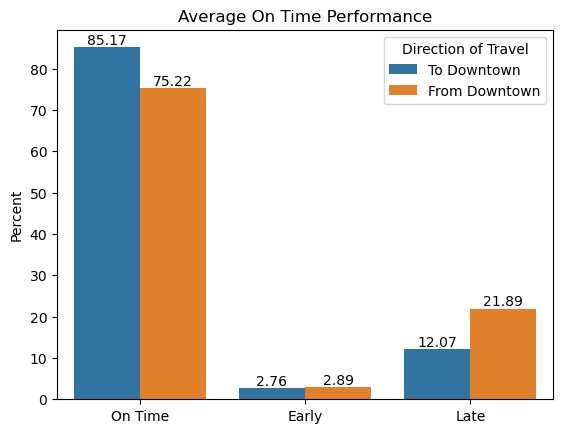

In [107]:
ax = sns.barplot(df, x='On Time Performance', y='Percent', hue='Direction of Travel')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Average On Time Performance')
ax.xaxis.label.set_visible(False)

In [82]:
direction_headway = (wego_drop_unknown
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_DIRECTION_NAME'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)


direction_headway

,ROUTE_DIRECTION_NAME,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_UNKNOWN
1,TO DOWNTOWN,4.922316,6.219645,88.858039,0.0
0,FROM DOWNTOWN,8.070264,9.316761,82.612975,0.0


In [108]:
# initialize list of lists
data = [['To Downtown', 88.86, 'Acceptable'],
        ['To Downtown', 6.22, 'Gapping'],
        ['To Downtown', 4.92, 'Bunching'],
        ['From Downtown', 82.61, 'Acceptable'],
        ['From Downtown', 9.32, 'Gapping'],
        ['From Downtown', 8.07, 'Bunching']]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Direction of Travel', 'Percent', 'Headway Category'])
 
# print dataframe.
df

,Direction of Travel,Percent,Headway Category
0,To Downtown,88.86,Acceptable
1,To Downtown,6.22,Gapping
2,To Downtown,4.92,Bunching
3,From Downtown,82.61,Acceptable
4,From Downtown,9.32,Gapping
5,From Downtown,8.07,Bunching


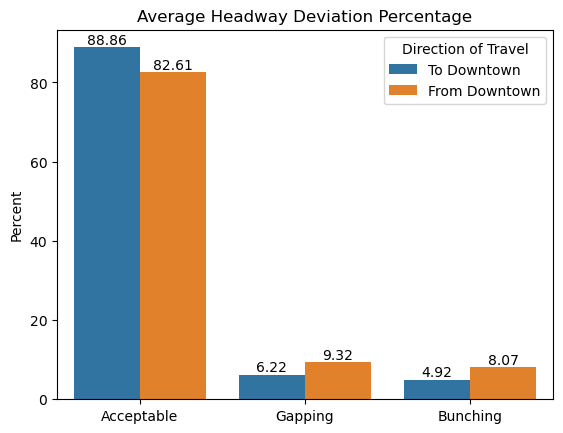

In [109]:
ax = sns.barplot(df, x='Headway Category', y='Percent', hue='Direction of Travel')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Average Headway Deviation Percentage')
ax.xaxis.label.set_visible(False)

In [38]:


# wego.groupby('ROUTE_DIRECTION_NAME')['HEADWAY_DEVIATION_PERCENTAGE'].agg(['min', 'mean', 'max'])

In [39]:
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']}))

In [40]:
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']}).agg({'HDWY_DEV': ['mean']})
# round(wego.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HEADWAY_DEVIATION_PERCENTAGE', 'mean'), Bunching=('HEADWAY_IS_BUNCHING', 'mean')),2).reset_index()
# # print('')
# # wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['mean']})
# # sns.barplot(df2, x='ROUTE_ABBR', y='HDWY_DEV')

In [41]:
# # initialize list of lists
# data2 = [['3', 0.54, 'Headway Deviation Percentage'],
#         ['3', -3.71, 'Adherence'],
#         ['7', 0.33, 'Headway Deviation Percentage'],
#         ['7', -3.48, 'Adherence'],
#         ['22', 0.57, 'Headway Deviation Percentage'],
#         ['22', -1.07, 'Adherence'],
#         ['23', 0.82, 'Headway Deviation Percentage'],
#         ['23', -1.64, 'Adherence'],
#         ['50', 0.17, 'Headway Deviation Percentage'],
#         ['50', -2.42, 'Adherence'],
#         ['52', 0.71, 'Headway Deviation Percentage'],
#         ['52', -3.73, 'Adherence'],
#         ['55', 0.19, 'Headway Deviation Percentage'],
#         ['55', -4.62, 'Adherence'],
#         ['56', 0.12, 'Headway Deviation Percentage'],
#         ['56', -2.65, 'Adherence']]
# # Create the pandas DataFrame
# df2 = pd.DataFrame(data2, columns=['Route', 'Mean', 'Metric'])
 
# # print dataframe.
# df2

In [42]:
# sns.barplot(df2, x='Route', y='Mean', hue='Metric')

In [43]:
# print(wego.groupby(by='ROUTE_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='ROUTE_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [44]:
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'HEADWAY_DEVIATION_PERCENTAGE': ['min','max','mean']}))
# print('')
# print(wego.groupby(by='TIME_POINT_ABBR').agg({'ADHERENCE': ['min','max','mean']}))

In [113]:
route_headway = (wego_drop_unknown
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

route_headway.insert(0, 'Route', ['Bordeaux','Charlotte Pike','Dickerson Pike','Hillsboro','West End','Gallatin Pike','Nolensville Pike','Murfreesboro Pike'], allow_duplicates=True)

route_headway

,Route,ROUTE_ABBR,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_UNKNOWN
2,Bordeaux,22,1.779020,4.155283,94.065697,0.0
4,Charlotte Pike,50,2.946324,3.658110,93.395566,0.0
3,Dickerson Pike,23,2.169950,6.348979,91.481071,0.0
1,Hillsboro,7,3.739637,5.027342,91.233022,0.0
0,West End,3,5.810863,7.676762,86.512375,0.0
7,Gallatin Pike,56,7.491632,8.006276,84.502092,0.0
5,Nolensville Pike,52,7.204082,8.938776,83.857143,0.0
6,Murfreesboro Pike,55,13.142214,12.704003,74.153783,0.0


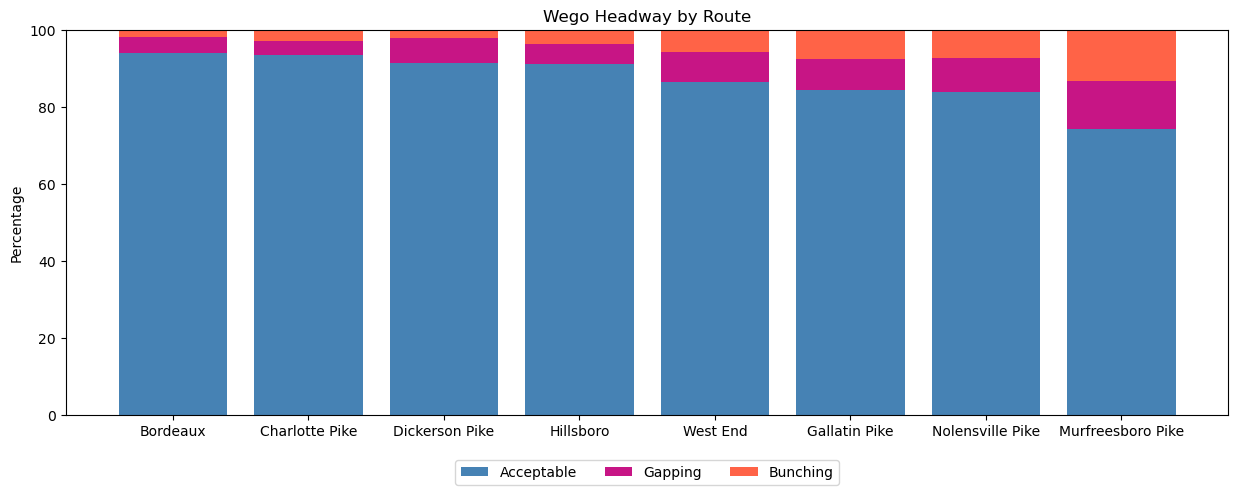

In [163]:
x=route_headway['Route']
y3=route_headway['HEADWAY_IS_BUNCHING']
y2=route_headway['HEADWAY_IS_GAPPING']
y1=route_headway['HEADWAY_IS_ACCEPTABLE']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(15,5))

# bar_colors = ['4682B4', 'c71585', 'ff6347']

plt.bar(x, y1, color='steelblue')
plt.bar(x, y2, bottom=y1, color='mediumvioletred')
plt.bar(x, y3, bottom=y1+y2, color='tomato')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["Acceptable", "Gapping", "Bunching"])
plt.ylim((0,100))
plt.title("Wego Headway by Route")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['Acceptable', 'Gapping', 'Bunching'])
plt.show()

In [191]:
route_on_time = (wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['ROUTE_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

route_on_time.insert(0, 'Route', ['Bordeaux','Dickerson Pike','Charlotte Pike','Gallatin Pike','Hillsboro','Nolensville Pike','West End','Murfreesboro Pike'], allow_duplicates=True)

# route_on_time

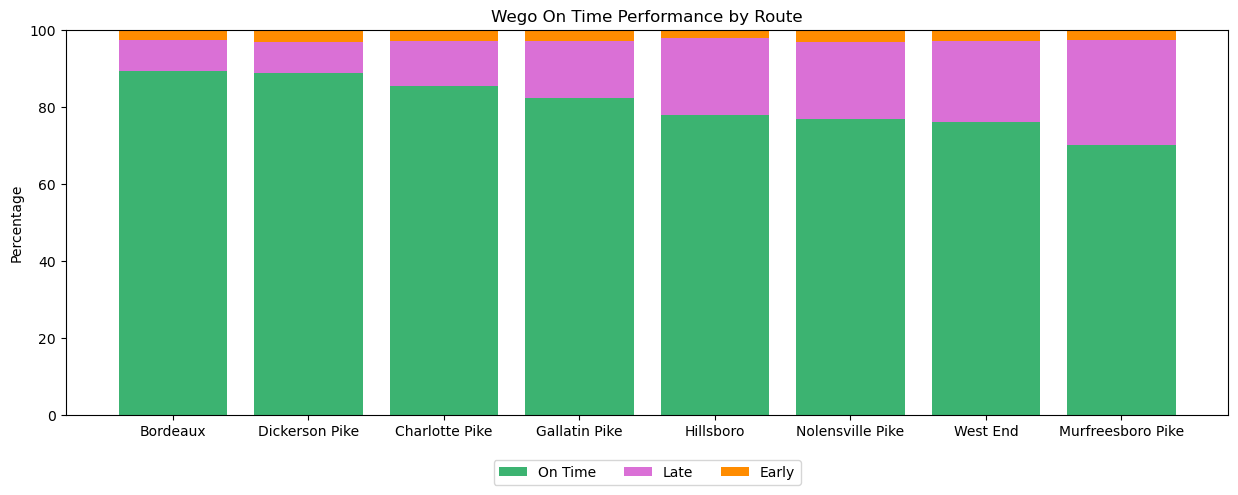

In [166]:
x=route_on_time['Route']
y3=route_on_time['ADJUSTED_EARLY_COUNT']
y2=route_on_time['ADJUSTED_LATE_COUNT']
y1=route_on_time['ADJUSTED_ONTIME_COUNT']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(15,5))

plt.bar(x, y1, color='mediumseagreen')
plt.bar(x, y2, bottom=y1, color='orchid')
plt.bar(x, y3, bottom=y1+y2, color='darkorange')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["Early", "Late", "On Time"])
plt.ylim((0,100))
plt.title("Wego On Time Performance by Route")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['On Time', 'Late', 'Early'])
plt.show()

In [190]:
location_headway = (wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)


# location_headway.tail(20)


In [212]:
location_headway2 = (wego_drop_unknown
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR', 'ROUTE_ABBR'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

location_headway2

,TIME_POINT_ABBR,ROUTE_ABBR,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE
11,ELIZ,22,0.000000,0.462963,99.537037
32,MHSP,22,0.000000,0.880000,99.120000
21,HPKL,22,0.000000,0.995475,99.004525
1,25ACLARK,22,0.089047,2.226180,97.684773
34,MP&R,3,0.311365,2.335236,97.353399
43,WALM,50,0.964348,2.133255,96.902396
17,HCKP,52,0.763016,2.872531,96.364452
46,WHBG,3,1.048618,2.669209,96.282173
18,HDANT,52,1.045817,3.635458,95.318725
28,MCC5_1,50,2.272065,2.883775,94.844160


In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wego[wego['TIME_POINT_ABBR'] == 'ELIZ']

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HEADWAY_DEVIATION_PERCENTAGE,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,HEADWAY_IS_UNKNOWN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.62,0,1,0,0
15,120230801,1,99457905,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 06:46:00,2023-08-01 06:48:00,2023-08-01 06:48:00,-2.000000,60.0,60.083333,0.083333,0,0,1,0,0.0,0,0.000000,NaN,0.14,0,1,0,0
20,120230801,1,99457910,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-01 07:31:00,2023-08-01 07:30:25,2023-08-01 07:30:25,0.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
75,120230801,1,99457965,2023-08-01,22,2200,2689,345126,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-01 16:44:00,2023-08-01 16:49:26,2023-08-01 16:49:26,-5.433333,50.0,49.683333,-0.316667,0,0,1,0,0.0,0,0.000000,NaN,-0.63,0,1,0,0
125,120230801,1,99458017,2023-08-01,22,2201,1617,345213,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:11:00,2023-08-01 05:10:57,2023-08-01 05:10:57,0.050000,25.0,22.500000,-2.500000,0,0,1,0,0.0,0,0.000000,NaN,-10.00,0,1,0,0
259,120230801,1,99458153,2023-08-01,22,2202,1222,345307,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-01 15:54:00,2023-08-01 15:59:45,2023-08-01 15:59:45,-5.750000,503.0,509.333333,6.333333,0,0,1,0,0.0,0,0.000000,NaN,1.26,0,1,0,0
6462,120230802,1,99491785,2023-08-02,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 04:46:00,2023-08-02 04:49:00,2023-08-02 04:49:00,-3.000000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,1
6469,120230802,1,99491792,2023-08-02,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 05:46:00,2023-08-02 05:47:17,2023-08-02 05:47:17,-1.283333,35.0,36.900000,1.900000,0,0,1,0,0.0,0,0.000000,NaN,5.43,0,1,0,0
6476,120230802,1,99491799,2023-08-02,22,2200,1040,345108,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-02 06:46:00,2023-08-02 06:48:04,2023-08-02 06:48:04,-2.066666,60.0,60.783333,0.783333,0,0,1,0,0.0,0,0.000000,NaN,1.31,0,1,0,0


In [52]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
wego[wego['ROUTE_ABBR'] == 22]['ROUTE_STOP_SEQUENCE']

0         14.0
1         10.0
2          5.0
3          1.0
4          1.0
5          5.0
6         14.0
7         14.0
8         10.0
9          5.0
10         1.0
11         1.0
12         5.0
13        14.0
14        14.0
15        10.0
16         5.0
17         1.0
18         1.0
19         5.0
20        10.0
21        14.0
22        14.0
23         5.0
24         1.0
25         1.0
26         5.0
27        14.0
28        14.0
29         5.0
30         1.0
31         1.0
32         5.0
33        14.0
34        14.0
35         5.0
36         1.0
37         1.0
38         5.0
41         8.0
43         5.0
44         1.0
45         1.0
46         5.0
47        14.0
48        14.0
49         5.0
50         1.0
51         1.0
52         5.0
54        12.0
55        13.0
57         5.0
58         1.0
59         1.0
60         5.0
61        14.0
62        14.0
63         5.0
64         1.0
65         1.0
66         5.0
68        12.0
69        13.0
71         5.0
72         1.0
73        

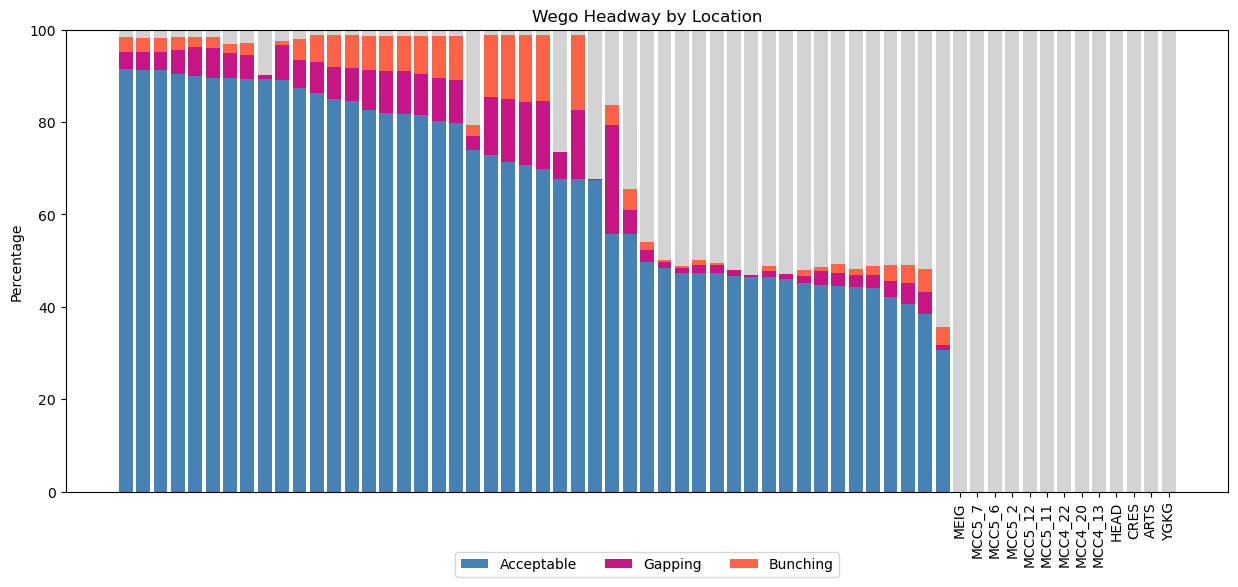

In [205]:
x=location_headway['TIME_POINT_ABBR']
y3=location_headway['HEADWAY_IS_BUNCHING']
y2=location_headway['HEADWAY_IS_GAPPING']
y1=location_headway['HEADWAY_IS_ACCEPTABLE']
y4=location_headway['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(15,6))

plt.bar(x, y1, color='steelblue')
plt.bar(x, y2, bottom=y1, color='mediumvioletred')
plt.bar(x, y3, bottom=y1+y2, color='tomato')
plt.bar(x, y4, bottom=y1+y2+y3, color='lightgrey')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable"])
plt.ylim((0,100))
plt.title("Wego Headway by Location")
plt.xticks([48,49,50,51,52,53,54,55,56,57,58,59,60])
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['Acceptable', 'Gapping', 'Bunching'])
plt.show()

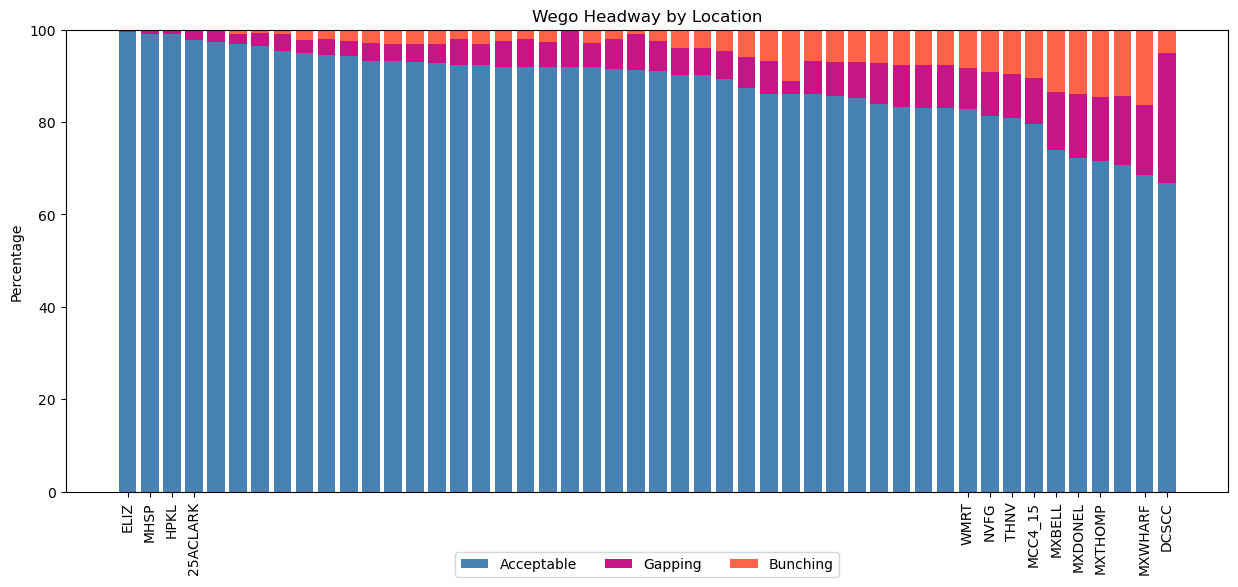

In [211]:
x=location_headway2['TIME_POINT_ABBR']
y3=location_headway2['HEADWAY_IS_BUNCHING']
y2=location_headway2['HEADWAY_IS_GAPPING']
y1=location_headway2['HEADWAY_IS_ACCEPTABLE']

plt.figure(figsize=(15,6))

plt.bar(x, y1, color='steelblue')
plt.bar(x, y2, bottom=y1, color='mediumvioletred')
plt.bar(x, y3, bottom=y1+y2, color='tomato')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["Acceptable", "Bunching", "Gapping"])
plt.ylim((0,100))
plt.title("Wego Headway by Location")
plt.xticks([0,1,2,3,38,39,40,41,42,43,44,46,47])
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['Acceptable', 'Gapping', 'Bunching'])
plt.show()

# top 4 are Bordeux, bottom are Murfreesboro Pike and Nolensville Pike Routes

In [237]:
location_on_time = (wego
#  .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['TIME_POINT_ABBR'])
 [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
 .mean()*100
 ).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)


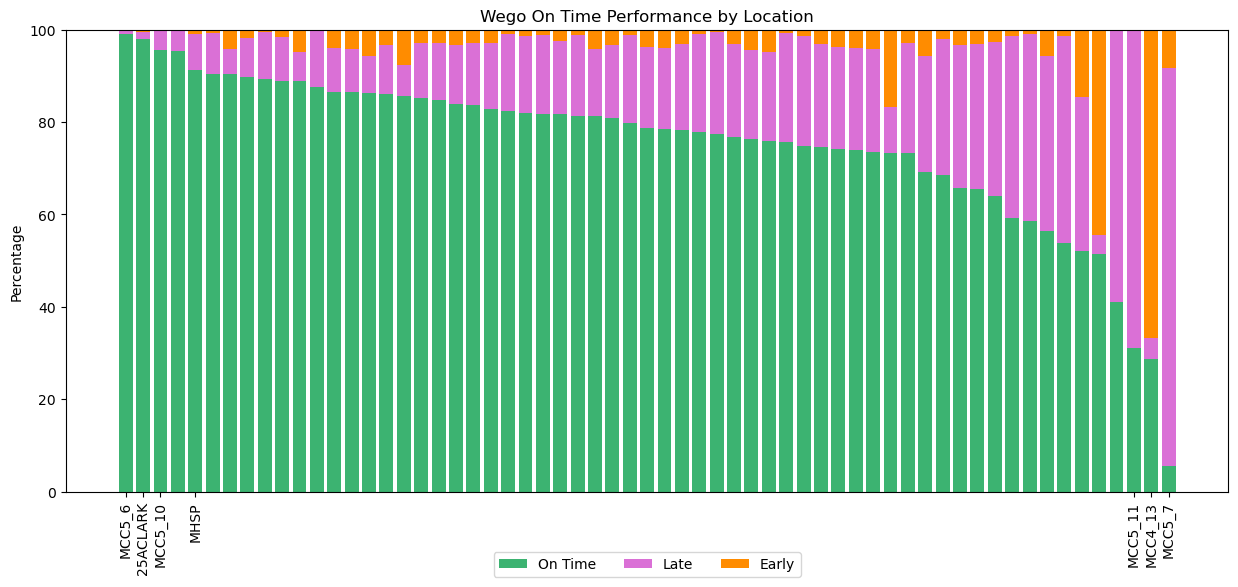

In [238]:
x=location_on_time['TIME_POINT_ABBR']
y3=location_on_time['ADJUSTED_EARLY_COUNT']
y2=location_on_time['ADJUSTED_LATE_COUNT']
y1=location_on_time['ADJUSTED_ONTIME_COUNT']

plt.figure(figsize=(15,6))

plt.bar(x, y1, color='mediumseagreen')
plt.bar(x, y2, bottom=y1, color='orchid')
plt.bar(x, y3, bottom=y1+y2, color='darkorange')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["On Time", "Late", "Early"])
plt.ylim((0,100))
plt.title("Wego On Time Performance by Location")
plt.xticks([0,1,2,4,58,59,60])
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, labels=['On Time', 'Late', 'Early'])
plt.show()

# Top is again Bordeaux, 

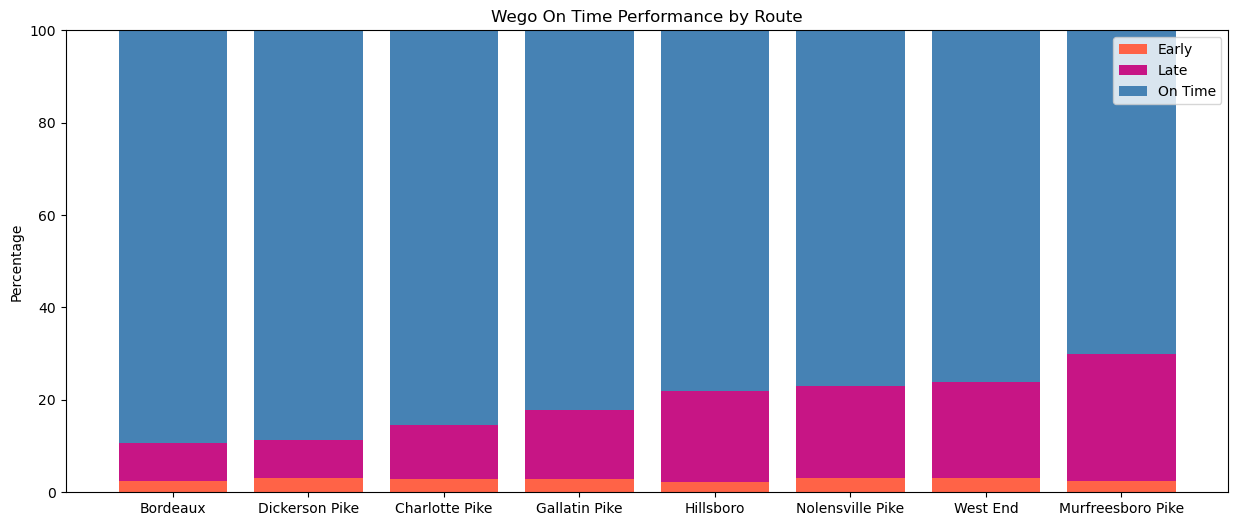

In [56]:
x=route_on_time['Route']
y1=route_on_time['ADJUSTED_EARLY_COUNT']
y2=route_on_time['ADJUSTED_LATE_COUNT']
y3=route_on_time['ADJUSTED_ONTIME_COUNT']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(15,6))

plt.bar(x, y1, color='tomato')
plt.bar(x, y2, bottom=y1, color='mediumvioletred')
plt.bar(x, y3, bottom=y1+y2, color='steelblue')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
# plt.xlabel("Route")
plt.ylabel("Percentage")
plt.legend(["Early", "Late", "On Time"])
plt.ylim((0,100))
plt.title("Wego On Time Performance by Route")
plt.show()

# Q3

### How does time of day or day of week affect headway and on-time performance?

In [57]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333927 entries, 0 to 350328
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CALENDAR_ID                   333927 non-null  int64  
 1   SERVICE_ABBR                  333927 non-null  int64  
 2   ADHERENCE_ID                  333927 non-null  int64  
 3   DATE                          333927 non-null  object 
 4   ROUTE_ABBR                    333927 non-null  int64  
 5   BLOCK_ABBR                    333927 non-null  int64  
 6   OPERATOR                      333927 non-null  int64  
 7   TRIP_ID                       333927 non-null  int64  
 8   OVERLOAD_ID                   333927 non-null  int64  
 9   ROUTE_DIRECTION_NAME          333927 non-null  object 
 10  TIME_POINT_ABBR               333927 non-null  object 
 11  ROUTE_STOP_SEQUENCE           333922 non-null  float64
 12  TRIP_EDGE                     333927 non-null  in

In [58]:
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format = 'mixed')

In [59]:
wego_day = (wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .groupby(['day'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
 ).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)
# .sort_values('mean', ascending=False)

# Averages for all days indicate a tendancy toward gapping - related to adherence
# The smallest average gapping values are occuring on Mondays and Saturdays
# The largest average gapping values occur on Thursdays and Fridays

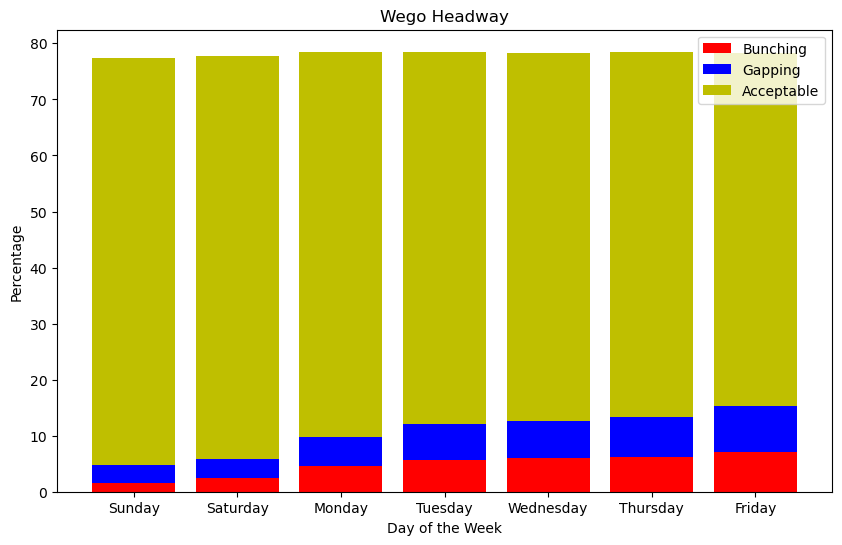

In [60]:
x=wego_day['day']
y1=wego_day['HEADWAY_IS_BUNCHING']
y2=wego_day['HEADWAY_IS_GAPPING']
y3=wego_day['HEADWAY_IS_ACCEPTABLE']
# y4=wego_day['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Day of the Week")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable", "Unknown"])
plt.title("Wego Headway")
plt.show()

In [61]:
# # Creating dataframe to look at headway deviation perc by day and hour
# dh = wego.assign(day = wego['SCHEDULED_TIME'].dt.day_name()).assign(hour = wego['SCHEDULED_TIME'].dt.hour).groupby(['day','hour'])['HEADWAY_DEVIATION_PERCENTAGE'].mean().reset_index()

# # Graphing this data with Seaborn

# # Defining the order of days of the week
# days_of_week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# # Creating the FacetGrid
# g = sns.FacetGrid(dh, 
#                   col="day", 
#                   col_order=days_of_week_order, 
#                   col_wrap=4)
# g.map_dataframe(sns.barplot, 
#                 x="hour", 
#                 y="HEADWAY_DEVIATION_PERCENTAGE", 
#                 palette='husl')

# # Fine Tuning
# g.fig.suptitle("Headway Deviation Percentage by Hour and Day", fontsize=16, y=1.05)
# g.set_axis_labels("Hour of Day", "Headway Deviation Percentage")
# g.set_titles("{col_name}")
# g.set_xticklabels(rotation=45)

# # Show the plot
# plt.show()

In [62]:
wego_hour = (wego
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .groupby(['hour'])
 [['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
 .mean()*100
).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

# The largest average bunching values are occuring at 4am and 1am
# the largest average gapping values occur at 7am and 3pm

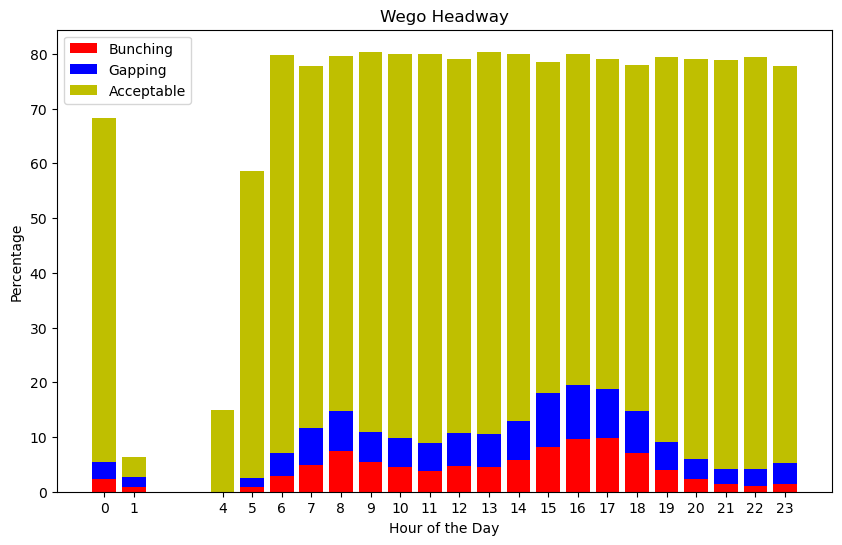

In [63]:
x=wego_hour['hour']
y1=wego_hour['HEADWAY_IS_BUNCHING']
y2=wego_hour['HEADWAY_IS_GAPPING']
y3=wego_hour['HEADWAY_IS_ACCEPTABLE']
# y4=wego_hour['HEADWAY_IS_UNKNOWN']

plt.figure(figsize=(10,6))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
# plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage")
plt.legend(["Bunching", "Gapping", "Acceptable"])
plt.title("Wego Headway")
plt.xticks(x)
plt.show()

In [64]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['day'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean').reset_index()

# Averages for all days indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring on Mondays and Sundays
# the largest average late values occur on Fridays and Saturdays

,day,mean,std,median,max,sum
0,Friday,-3.692639,5.637897,-2.350000,9.266666,-203113.604928
1,Saturday,-3.347112,5.445192,-2.166666,9.416666,-119414.908930
2,Thursday,-3.338955,5.439898,-2.083333,9.300000,-185305.305113
3,Wednesday,-3.186093,5.094743,-2.050000,9.466666,-179383.405147
4,Tuesday,-2.935254,4.519801,-2.000000,9.433333,-164383.005180
5,Sunday,-2.423951,4.781963,-1.550000,9.466666,-69203.794716
6,Monday,-2.337847,4.058020,-1.650000,9.466666,-109626.341186


In [65]:
(wego
 .assign(day = wego['SCHEDULED_TIME'].dt.day_name())
 .assign(hour = wego['SCHEDULED_TIME'].dt.hour)
 .assign(month = wego['SCHEDULED_TIME'].dt.month)
 .groupby(['hour'])
 ['ADHERENCE']
 .agg(['mean', 'std', 'median','max', 'sum'])
).sort_values('max', ascending=False).sort_values('mean')

# Averages for all hours indicate a tendancy toward late departures - related to gapping
# The smallest average late values are occuring at 4am and 5am
# the largest average late values occur at 4pm and 5pm

,mean,std,median,max,sum
hour,,,,,
17,-4.745297,7.023495,-2.716666,9.333333,-97226.395385
16,-4.634179,6.821733,-2.750000,9.100000,-99491.195271
18,-4.114649,5.930042,-2.616666,9.100000,-69780.329375
15,-4.056079,5.848044,-2.650000,9.233333,-87355.778520
19,-4.015721,5.380919,-2.833333,8.516666,-53421.130116
8,-3.669963,4.979157,-2.400000,9.383333,-74636.028716
1,-3.618168,6.557112,-1.650000,6.316666,-401.616657
23,-3.409196,6.456656,-1.633333,9.300000,-30682.764864
20,-3.357250,4.669901,-2.450000,9.200000,-40723.447174


# 4

### How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [66]:
# wego.groupby('OPERATOR')[['CALENDAR_ID', 'TRIP_ID']].nunique().reset_index()

# Getting unique trip and operator
unique_trips = wego[['TRIP_ID', 'CALENDAR_ID', 'OPERATOR']].drop_duplicates()

# Grouping by operator to view # trips
operator_trip_counts = unique_trips.groupby('OPERATOR').size().reset_index(name='Number_of_Trips')
operator_trip_counts.sort_values('Number_of_Trips', ascending=False)

,OPERATOR,Number_of_Trips
106,1762,786
105,1761,719
164,2164,570
13,379,550
39,1170,532
34,1040,530
38,1147,524
88,1617,513
116,1823,501
48,1222,499


C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Trips', ylabel='Count'>

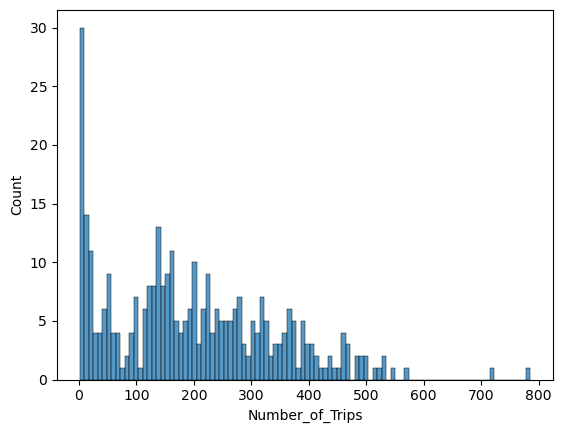

In [67]:
sns.histplot(data=operator_trip_counts, x="Number_of_Trips", bins=100)

In [68]:
perc1=operator_trip_counts['Number_of_Trips'].quantile(0.10)
print(perc1)

# perc99=operator_trip_counts['Number_of_Trips'].quantile(0.90)
# print(perc99)

9.0


In [69]:
operator_trip_counts = operator_trip_counts.drop(operator_trip_counts[operator_trip_counts.Number_of_Trips <50].index)
# operator_trip_counts = operator_trip_counts.drop(operator_trip_counts[operator_trip_counts.Number_of_Trips > perc99].index)

In [70]:
wego_clean = wego[wego['OPERATOR'].isin(operator_trip_counts['OPERATOR'])]

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Trips', ylabel='Count'>

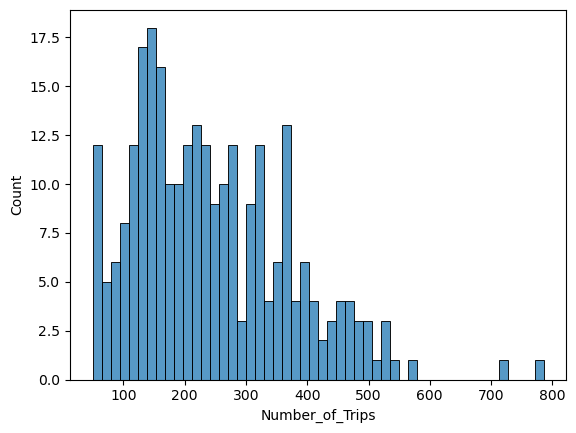

In [71]:
sns.histplot(data=operator_trip_counts, x="Number_of_Trips", bins=50)

In [72]:
# operator_mean = (
(wego_clean.groupby(['OPERATOR'])
[['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN']]
.mean()
).reset_index().sort_values('HEADWAY_IS_ACCEPTABLE', ascending=False)

# operator_1762 = wego[wego['OPERATOR']==1762]
# t=(operator_1762.groupby(['CALENDAR_ID'])
# [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
# .mean()
# ).reset_index().sort_values('CALENDAR_ID', ascending=True)

,OPERATOR,HEADWAY_IS_BUNCHING,HEADWAY_IS_GAPPING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_UNKNOWN
61,1566,0.014552,0.001819,0.818099,0.165530
163,2440,0.004206,0.014721,0.813880,0.167192
245,3027,0.016447,0.003289,0.809211,0.171053
227,2876,0.008008,0.019019,0.801802,0.171171
155,2368,0.001919,0.034549,0.796545,0.166987
25,1133,0.021906,0.025749,0.780938,0.171407
14,559,0.020267,0.030153,0.780524,0.169056
0,304,0.002064,0.049525,0.780437,0.167974
107,1927,0.015082,0.015082,0.780059,0.189778
145,2321,0.032440,0.019746,0.779267,0.168547


In [73]:
(wego_clean.groupby(['OPERATOR'])
[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
.mean()
).reset_index().sort_values('ADJUSTED_ONTIME_COUNT', ascending=False)

,OPERATOR,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
85,1762,0.002157,0.009491,0.988352
65,1597,0.000000,0.023256,0.976744
199,2639,0.014925,0.009950,0.975124
184,2573,0.000000,0.027363,0.972637
8,409,0.003384,0.025381,0.971235
61,1566,0.007731,0.021828,0.970441
151,2355,0.009597,0.021113,0.969290
7,379,0.010816,0.024786,0.964398
13,522,0.007170,0.029233,0.963596
107,1927,0.015920,0.023041,0.961039


In [74]:
operator_mean = operator_mean.drop(operator_mean[operator_mean.HEADWAY_IS_ACCEPTABLE < perc1].index)
operator_mean = operator_mean.drop(operator_mean[operator_mean.HEADWAY_IS_ACCEPTABLE > perc99].index)
# operator_mean = wego.drop(wego[wego.HDWY_DEV < percentile1hdwy].index)
# operator_mean = wego.drop(wego[wego.HDWY_DEV > percentile99hdwy].index)

NameError: name 'operator_mean' is not defined

In [ ]:
sns.histplot(data=operator_mean, x="HEADWAY_IS_ACCEPTABLE", bins=50)

In [ ]:
perc1=operator_mean['HEADWAY_IS_ACCEPTABLE'].quantile(0.05)
print(perc1)

perc99=operator_mean['HEADWAY_IS_ACCEPTABLE'].quantile(0.95)
print(perc99)

# print('')

# perc1_acceptable=wego['HDWY_DEV'].quantile(0.001)
# print(percentile1hdwy)

# percentile99hdwy=wego['HDWY_DEV'].quantile(0.999)
# print(percentile99hdwy)

# Q5

### Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [ ]:
bunching = wego[wego['HEADWAY_IS_BUNCHING']==1][['ADHERENCE', 'HDWY_DEV']].reset_index().sort_values('ADHERENCE')
# t=(operator_1762.groupby(['CALENDAR_ID'])
# [['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]
# .mean()
# ).reset_index().sort_values('CALENDAR_ID', ascending=True)
bunching

# (wego
#  .groupby(['HEADWAY_IS_BUNCHING', 'HEADWAY_IS_GAPPING', 'HEADWAY_IS_ACCEPTABLE', 'HEADWAY_IS_UNKNOWN'])
#  ['ADHERENCE']
#  )

In [ ]:
graph = sns.FacetGrid(bunching)
graph.map(sns.scatterplot, 'ADHERENCE', 'HDWY_DEV')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.show()

In [ ]:
q5 = wego[wego['HEADWAY_DEVIATION_PERCENTAGE']<400]


x = q5['ADHERENCE']
y = q5['HEADWAY_DEVIATION_PERCENTAGE']

warning = y>50

plt.scatter(x[~warning], y[~warning], s=1, alpha=.5, label='unacceptable', facecolors='none', edgecolors='b')
plt.scatter(x[warning], y[warning], s=1, alpha=.5, label='acceptable', facecolors='none', edgecolors='r')

plt.xlabel("Adherence")
plt.ylabel("Headway Deviation Percentage")

plt.show()


# t = q5['ADHERENCE']
# s = q5['HEADWAY_DEVIATION_PERCENTAGE']

# upper = 50
# lower = -50

# supper = np.ma.masked_where(s < upper, s)
# slower = np.ma.masked_where(s > lower, s)
# smiddle = np.ma.masked_where((s < lower) | (s > upper), s)

# fig, ax = plt.subplots()
# ax.plot(t, smiddle, t, slower, t, supper)
# plt.show()

In [ ]:
# x = np.linspace(0, 2*np.pi, 1000)
# y = np.sin(2*x)
# plt.scatter(x,y, c=(np.abs(y)), edgecolor='none')
# plt.show()

In [ ]:
sns.scatterplot(data=q5, x="ADHERENCE", y="HEADWAY_DEVIATION_PERCENTAGE", hue="SERVICE_ABBR", s=5)